UCI Machine Learning Repository'deki Auto MPG Veri Seti, otomobilin yakıt verimliliğini tahmin etmeye yönelik önemli bir veri setidir. Bu veri seti, 1970'ler ve 1980'lerde üretilen çeşitli otomobillerin özelliklerini içermektedir ve makine öğrenmesi ve istatistiksel analiz için yaygın olarak kullanılır.

## Auto MPG Veri Seti Özellikleri:
1. **Örneklem Sayısı**: 398 adet örnek içerir.

2. **Özellik Sayısı**: 8 özellik ve 1 hedef değişken (toplam 9 sütun).

##Değişkenler:
 * **MPG**: Miles Per Gallon (Galon başına mil) - Hedef



değişken, otomobilin yakıt verimliliğini gösterir.

* **Cylinders**: Silindir sayısı (motor gücü hakkında bilgi verir).

* **Displacement**: Motorun hacmi (inç küp cinsinden).

* **Horsepower**: Motor gücü (beygir gücü).

* **Weight**: Araç ağırlığı (lb cinsinden).

* **Acceleration**: Araç hızlanma kapasitesi (0-60 mil/saat hızlanma süresi).

* **Model Year**: Üretim yılı (otomobilin üretildiği yıl).

* **Origin**: Üretim yeri (1: ABD, 2: Avrupa, 3: Japonya).

* **Name**: Araç adı (isteğe bağlı bilgi, veriye dahil değildir, ancak bazen araç modeli bilgisi içerir).

##Kullanım Sebepleri:
1. **Yakıt Verimliliği Tahmini**: Bu veri seti, otomobillerin yakıt verimliliğini (MPG) tahmin etmek için kullanılır. Bu, otomobil tasarımını optimize etmek ve çevresel etkileri azaltmak için önemli bir konu olmuştur.

2. **Regresyon Problemleri**: Veri setindeki "MPG" değişkeni, bir regresyon modelinin hedef değişkeni olarak kullanılır. Özellikle, motor gücü, ağırlık ve hızlanma gibi araç özelliklerinden yakıt verimliliğini tahmin etmek amacıyla regresyon modelleri geliştirilir.

3. **Eğitim Amaçlı**: Bu veri seti, makine öğrenmesi ve veri analitiği öğrencileri için temel bir örnek teşkil eder. Regresyon problemleri ve veri ön işleme gibi konularda pratik yapmak için yaygın bir araçtır.

4. **Benchmark**: Farklı makine öğrenmesi algoritmalarının performansını karşılaştırmak için bir test veri seti olarak kullanılır.

5. **Özellik Mühendisliği**: Bu veri seti, araçların farklı özellikleri arasındaki ilişkileri keşfetmek için kullanılabilir. Bu, özellikle regresyon problemleri ve model optimizasyonu için önemlidir.

6. **Veri Ön İşleme**: Veri seti, çeşitli ölçekleme ve normalizasyon tekniklerinin nasıl uygulanacağını öğrenmek için iyi bir fırsat sunar. Özellikle, motor gücü ve ağırlık gibi sayısal özellikler farklı ölçeklerde olabilir, bu da veri ön işleme adımlarını gerektirir.

Auto MPG veri seti ile prediction modeli kurup tahmin yapacağız. Detaylar sunumumuzda olacaktır...

İlk olarak datasetimizi yükleyip genel bilgileri görüntüleyeceğiz.

METADATA BİLGİLERİ
{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had un

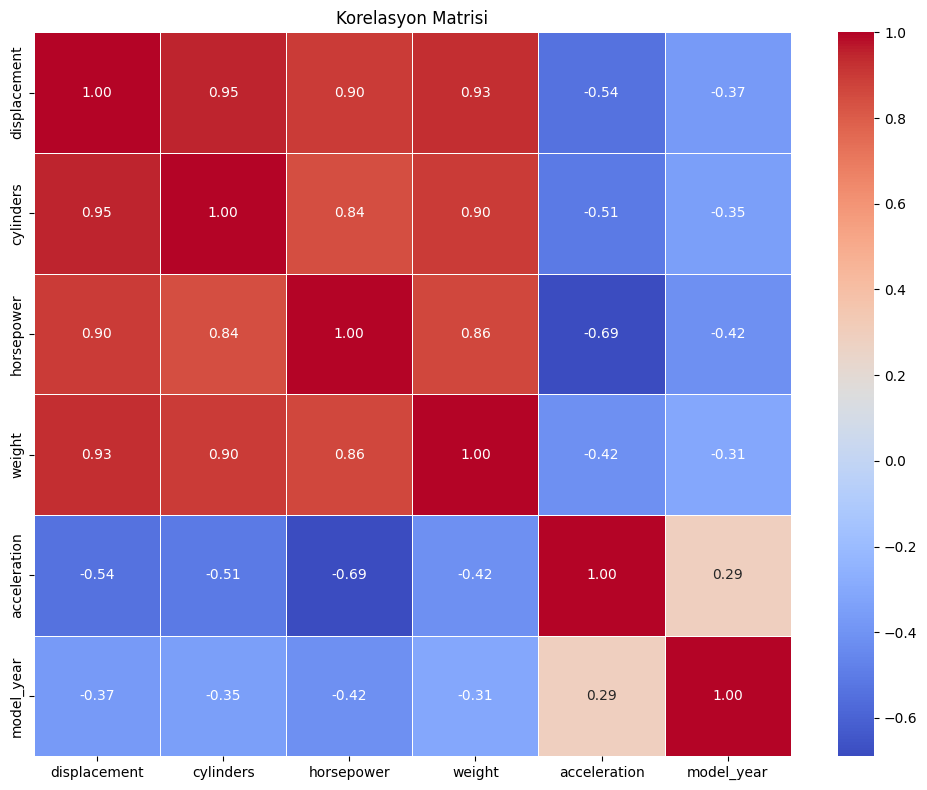

EKSİK DEĞER ANALİZİ
Eksik değer sayısı:
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64


VERİ SETİ BOYUTU
Satır sayısı: 398
Sütun sayısı: 8




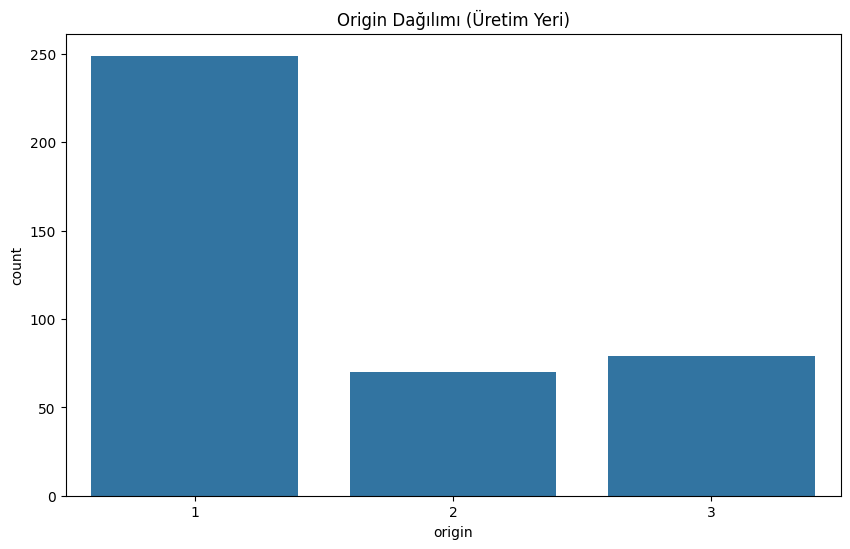

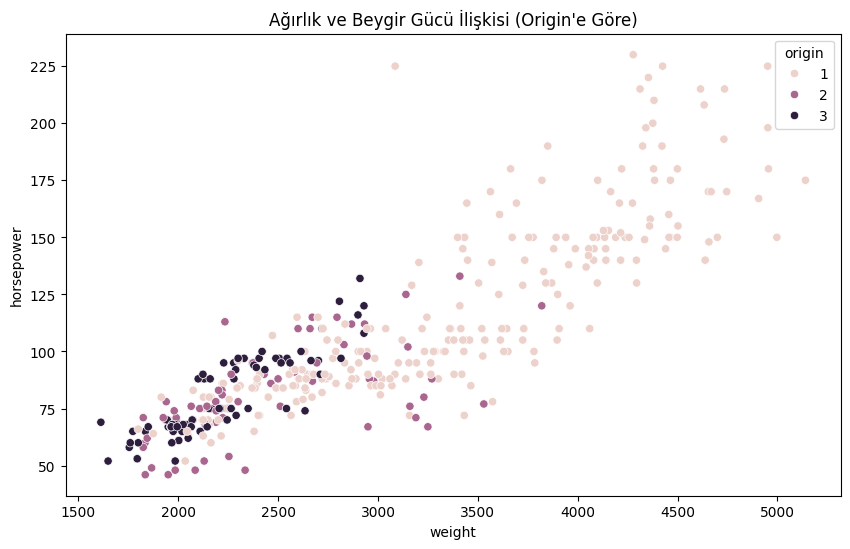

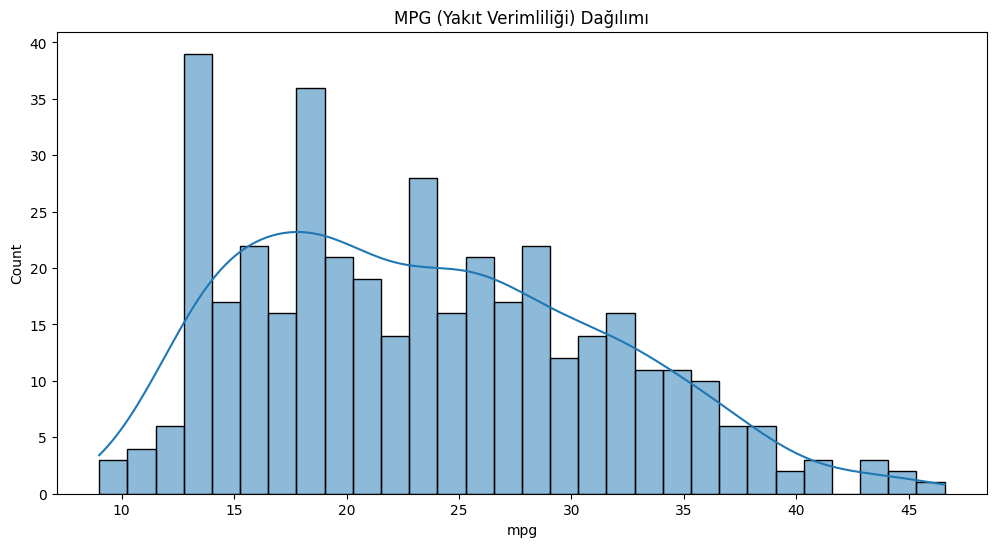

<Figure size 1500x1000 with 0 Axes>

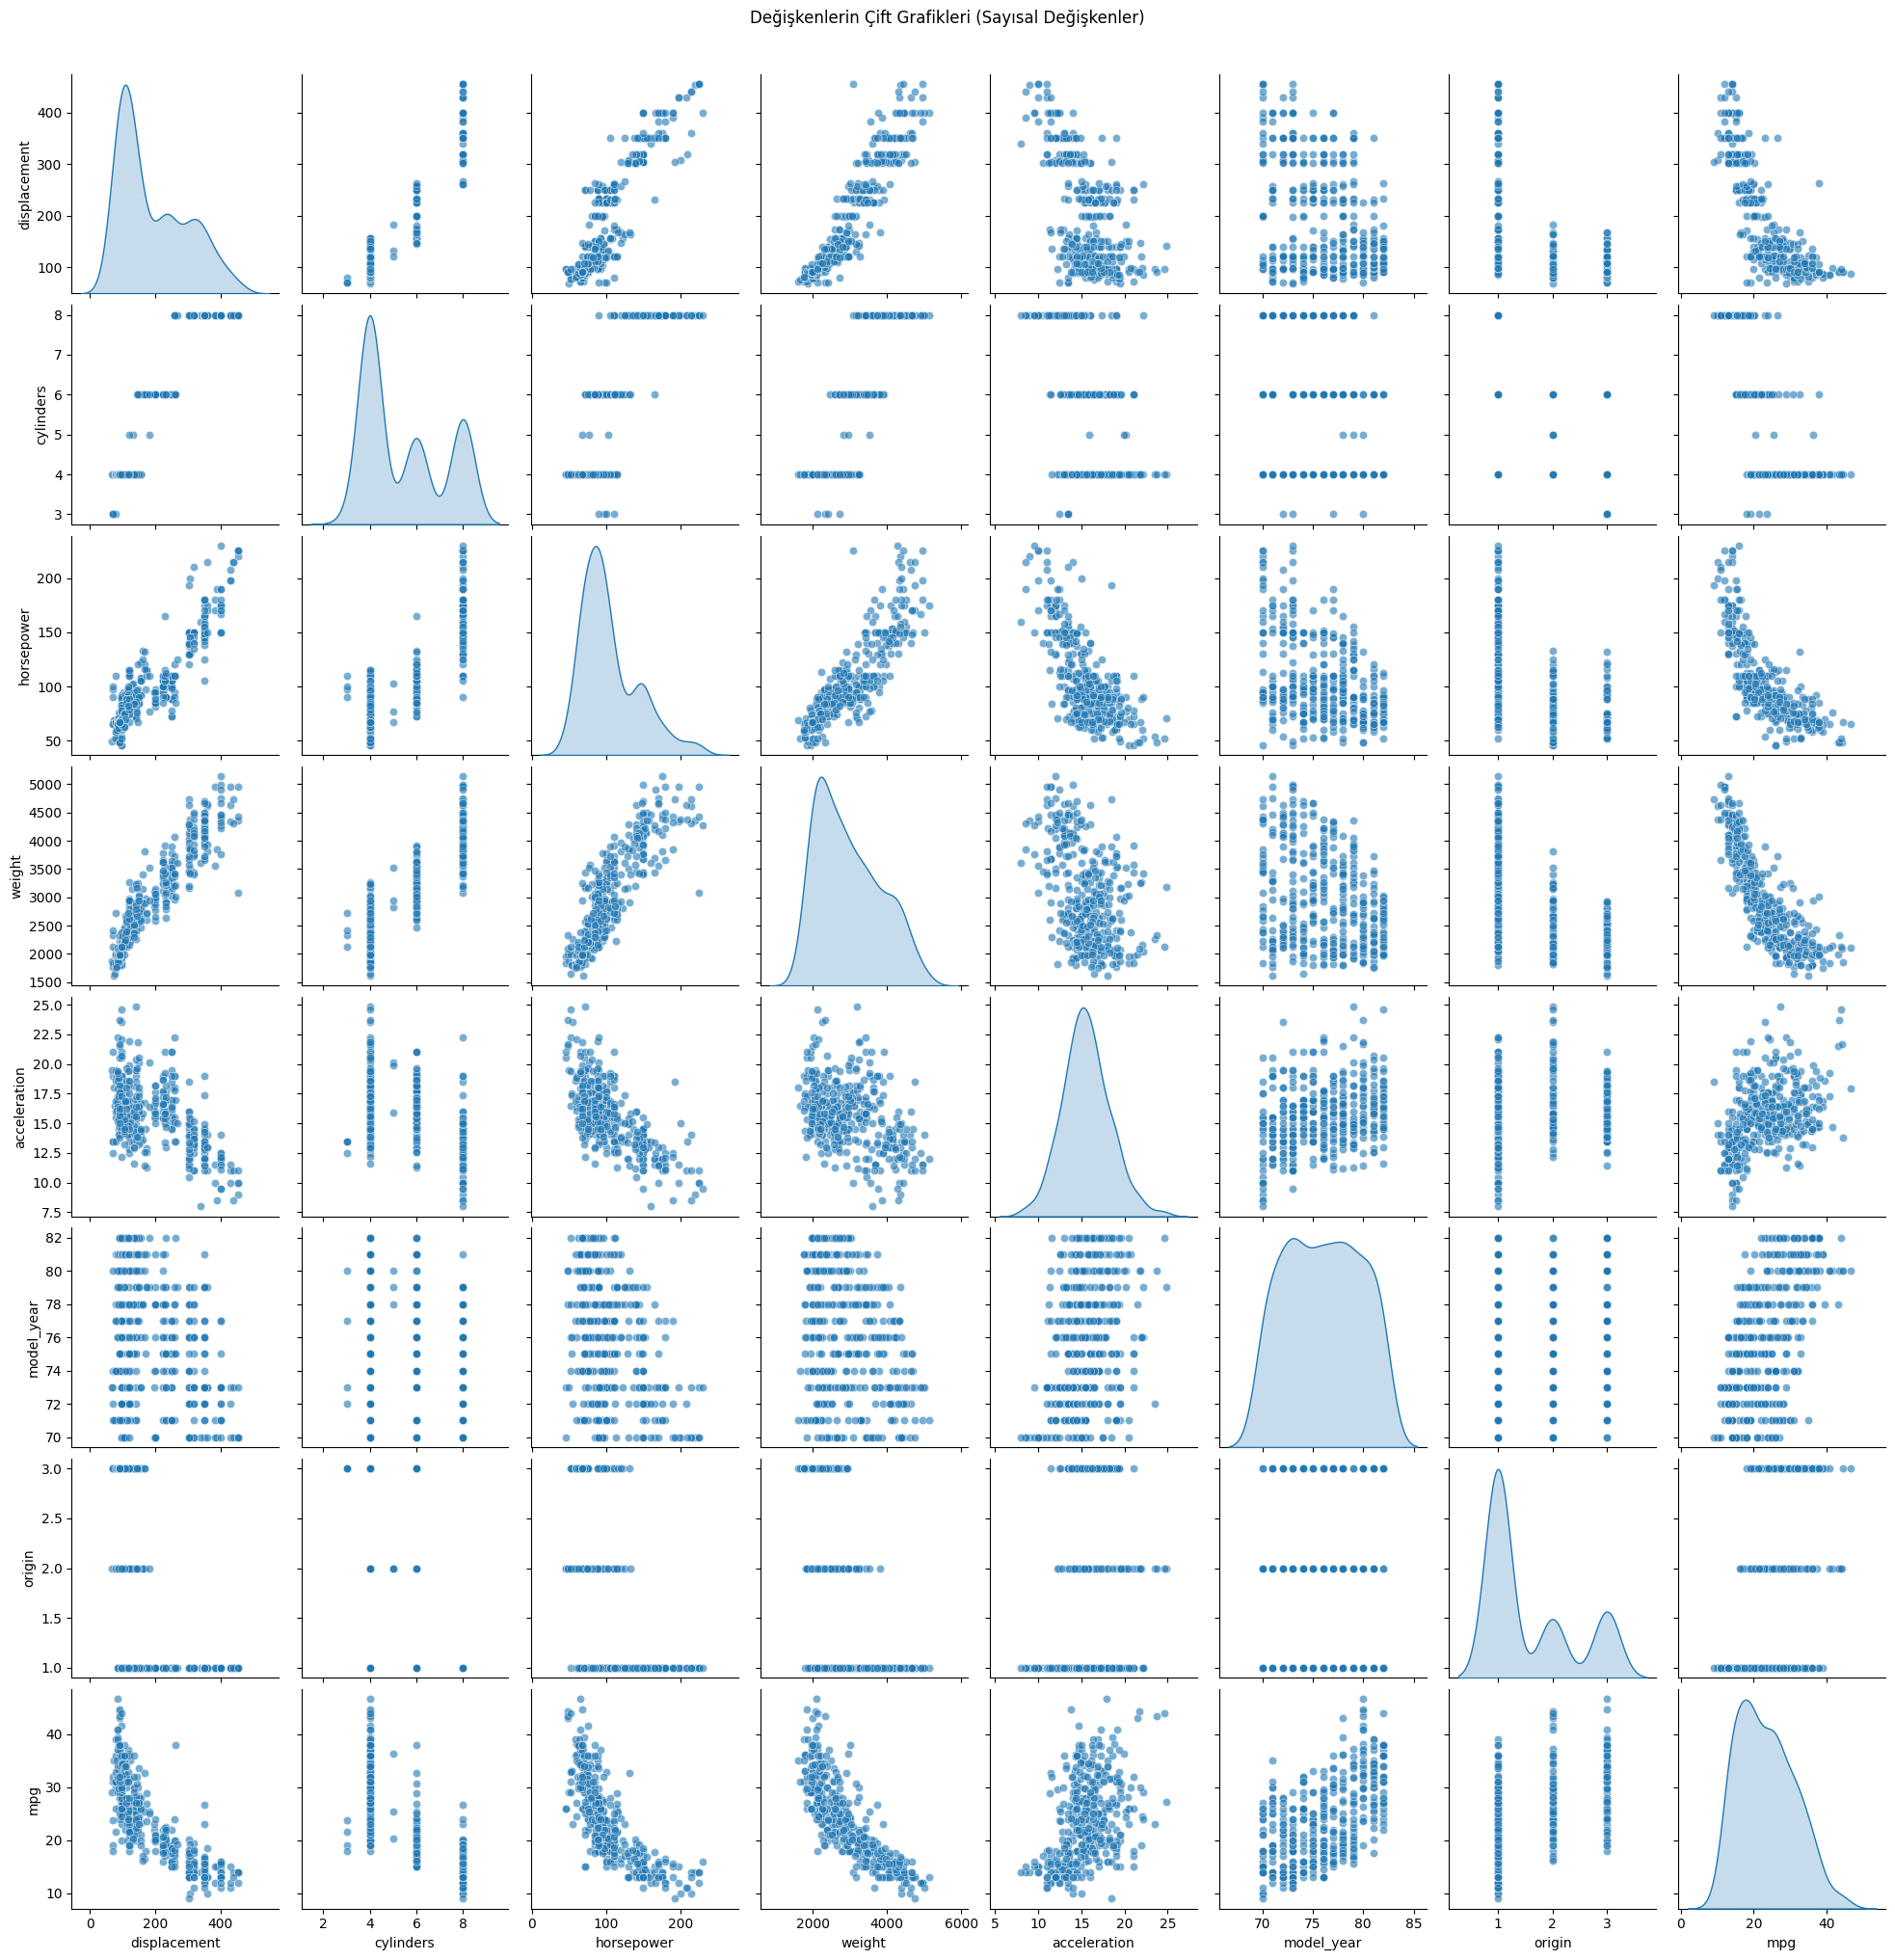

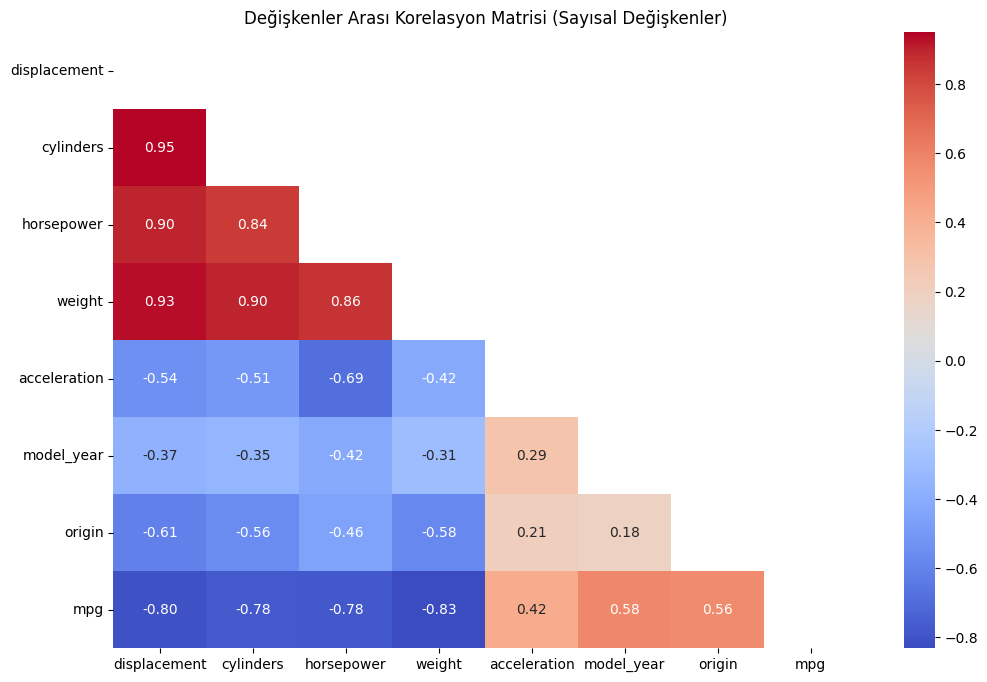

In [ ]:
# İlk olarak gerekli kütüphaneyi yükleyelim
!pip install ucimlrepo pandas matplotlib seaborn -q

# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo

# Veri setini yükleyelim
auto_mpg = fetch_ucirepo(id=9)  # Auto MPG veri seti ID'si 68'dir

# Verileri Pandas DataFrame olarak alalım
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Veri setini tek bir DataFrame'de birleştirelim
df = pd.concat([X, y], axis=1)

# Metadata bilgilerini görüntüleyelim
print("="*50)
print("METADATA BİLGİLERİ")
print("="*50)
print(auto_mpg.metadata)
print("\n")

# Değişken bilgilerini görüntüleyelim
print("="*50)
print("DEĞİŞKEN BİLGİLERİ")
print("="*50)
print(auto_mpg.variables)
print("\n")

# Verilerin ilk 10 satırını görüntüleyelim
print("="*50)
print("İLK 10 SATIR")
print("="*50)
print(df.head(10))
print("\n")

# Veri seti hakkında özet istatistikler
print("="*50)
print("ÖZET İSTATİSTİKLER")
print("="*50)
print(df.describe())
print("\n")

# Korelasyon Matrisi
plt.figure(figsize=(10, 8))
corr_matrix = X[numerical_cols].corr()  # Sadece sayısal verilerle korelasyon
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()


# Veri setinde eksik değer var mı kontrol edelim
print("="*50)
print("EKSİK DEĞER ANALİZİ")
print("="*50)
print("Eksik değer sayısı:")
print(df.isnull().sum())
print("\n")

# Veri setinin boyutunu görelim
print("="*50)
print("VERİ SETİ BOYUTU")
print("="*50)
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print("\n")

# Cinsiyet dağılımını görselleştirelim (burada 'origin' değişkenini kullanıyoruz)
plt.figure(figsize=(10, 6))
sns.countplot(x='origin', data=df)
plt.title('Origin Dağılımı (Üretim Yeri)')
plt.show()

# Ağırlık ve Beygir Gücü ilişkisini görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='horsepower', hue='origin', data=df)
plt.title('Ağırlık ve Beygir Gücü İlişkisi (Origin\'e Göre)')
plt.show()

# MPG (Yaş) dağılımını görselleştirelim
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='mpg', bins=30, kde=True)
plt.title('MPG (Yakıt Verimliliği) Dağılımı')
plt.show()

# Farklı değişkenlerin birbiriyle ilişkisini görselleştirelim
# Sayısal sütunlar ile pairplot oluşturalım
plt.figure(figsize=(15, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_df = df[numeric_cols]
sns.pairplot(plot_df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Değişkenlerin Çift Grafikleri (Sayısal Değişkenler)', y=1.02)
plt.show()

# Korelasyon matrisi - sayısal değişkenler için
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Değişkenler Arası Korelasyon Matrisi (Sayısal Değişkenler)')
plt.show()


Şimdi 2.kısmımıza geçiyoruz MLP eğitimini yapacağız.

MLP1 (SGD-ReLU) için Cross-Validation başlatılıyor...
MLP1 (SGD-ReLU) için Ortalama Cross-Validation RMSE: 8.0418
MLP2 (Adam-ReLU) için Cross-Validation başlatılıyor...
MLP2 (Adam-ReLU) için Ortalama Cross-Validation RMSE: 3.4806
MLP3 (LBFGS-Tanh) için Cross-Validation başlatılıyor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

MLP3 (LBFGS-Tanh) için Ortalama Cross-Validation RMSE: 4.5385
MLP4 (Adam-Logistic) için Cross-Validation başlatılıyor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

MLP4 (Adam-Logistic) için Ortalama Cross-Validation RMSE: 7.6031
Eksik değer kontrolü:
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

Eğitim verisi özeti:
       displacement   cylinders  horsepower       weight  acceleration  \
count    318.000000  318.000000  318.000000   318.000000    318.000000   
mean     191.904088    5.430818  103.130503  2969.015723     15.639937   
std      102.983802    1.684947   37.085324   840.617729      2.763269   
min       68.000000    3.000000   46.000000  1613.000000      8.000000   
25%       98.500000    4.000000   75.250000  2220.000000     13.900000   
50%      148.500000    4.000000   92.500000  2822.500000     15.500000   
75%      259.500000    6.000000  120.000000  3597.250000     17.300000   
max      455.000000    8.000000  225.000000  5140.000000     24.800000   

       model_year      origin  
count  318.000000  318.000000  
mea

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 167, loss = nan
Validation score: nan
Iteration 168, loss = nan
Validation score: nan
Iteration 169, loss = nan
Validation score: nan
Iteration 170, loss = nan
Validation score: nan
Iteration 171, loss = nan
Validation score: nan
Iteration 172, loss = nan
Validation score: nan
Iteration 173, loss = nan
Validation score: nan
Iteration 174, loss = nan
Validation score: nan
Iteration 175, loss = nan
Validation score: nan
Iteration 176, loss = nan
Validation score: nan
Iteration 177, loss = nan
Validation score: nan
Iteration 178, loss = nan
Validation score: nan
Iteration 179, loss = nan
Validation score: nan
Iteration 180, loss = nan
Validation score: nan
Iteration 181, loss = nan
Validation score: nan
Iteration 182, loss = nan
Validation score: nan
Iteration 183, loss = nan
Validation score: nan
Iteration 184, loss = nan
Validation score: nan
Iteration 185, loss = nan
Validation score: nan
Iteration 186, loss = nan
Validation score: nan
Iteration 187, loss = nan
Validation sco

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


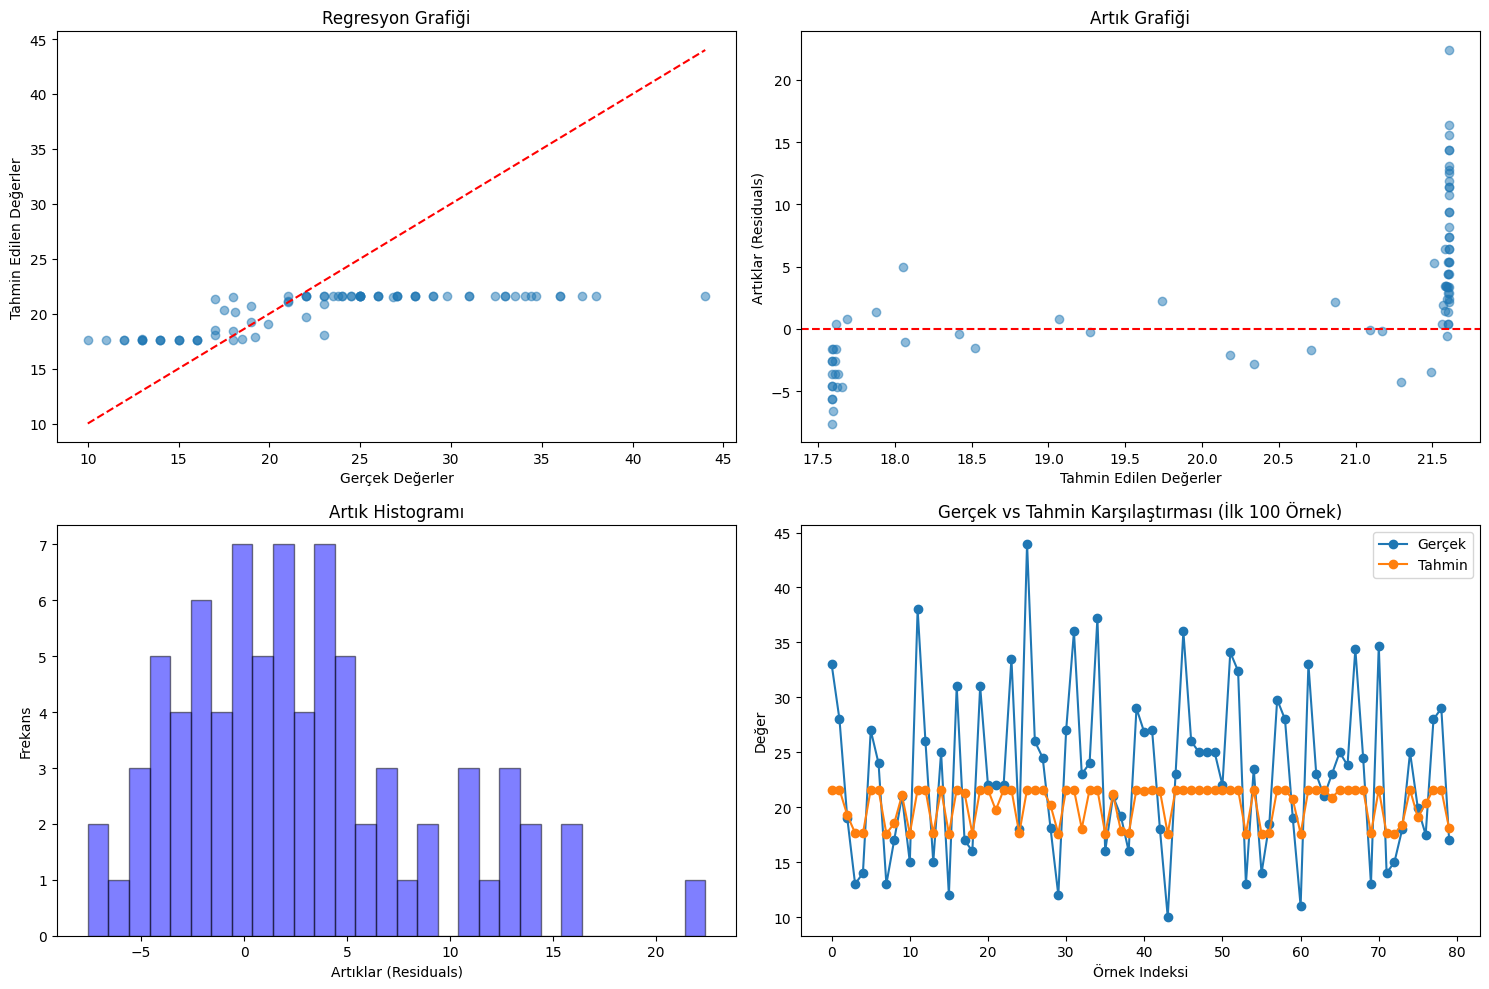

In [ ]:
# Gerekli kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.model_selection import cross_val_score

# Cross-Validation yaparak modellerin genel performansını değerlendirme
cv_results = {}
for name, model in mlp_models.items():
    print(f"{name} için Cross-Validation başlatılıyor...")
    cv_score = cross_val_score(model, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.mean(np.sqrt(-cv_score))  # Negatif MSE'yi pozitif RMSE'ye çeviriyoruz
    print(f"{name} için Ortalama Cross-Validation RMSE: {cv_results[name]:.4f}")


# Veri setini yükleyelim
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Veri setini tek bir DataFrame'de birleştirelim
df = pd.concat([X, y], axis=1)

# 1. Eksik değer kontrolü
print("Eksik değer kontrolü:")
print(df.isnull().sum())

# Eksik değerleri dolduralım - sayısal sütunlar için medyan kullanacağız
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)

# Alternatif olarak eksik değerleri tamamen kaldırmak isterseniz:
# df = df.dropna()

# Veriyi yeniden bölerek eğitim ve test setlerine ayıralım
X = df.drop('mpg', axis=1)  # 'mpg' tahmin edeceğimiz hedef değişken
y = df['mpg']

# 2. Eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Verinin ölçek aralığını kontrol edelim
print("\nEğitim verisi özeti:")
print(X_train.describe())

# 4. Veri ön işleme pipeline'ı oluştur
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# 5. MLP modelini oluştur
mlp = MLPRegressor(
    hidden_layer_sizes=(30, 20, 10),
    activation='relu',
    solver='sgd',  # Stokastik Gradyan İniş (SGD) kullanılıyor
    learning_rate_init=0.01,  # Öğrenme oranını düşürüyoruz
    momentum=0.9,
    max_iter=1000,
    random_state=42,
    verbose=True,
    early_stopping=True,  # Erken durdurma ekliyoruz
    validation_fraction=0.1  # Doğrulama seti oranı
)

# 6. Pipeline oluştur
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', mlp)
])

# 7. Veri ön işleme adımını manuel yapalım
print("Veri ön işleme adımı...")
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Modeli eğit
print("\nModel eğitim başlıyor...")
mlp.fit(X_train_scaled, y_train.values.ravel())
print("Model eğitimi tamamlandı!")

# 8. Test seti üzerinde tahmin yap
y_pred = mlp.predict(X_test_scaled)

# 9. Model performans metriklerini hesapla
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# MAPE hesaplarken 0 değerlerine dikkat etmeliyiz
mask = y_test.values.flatten() != 0
if np.any(mask):
    mape = np.mean(np.abs((y_test.values.flatten()[mask] - y_pred[mask]) / y_test.values.flatten()[mask])) * 100
else:
    mape = np.nan  # Eğer hiç geçerli değer yoksa NaN döndür

print("\nModel Performans Metrikleri:")
print(f"MAE (Ortalama Mutlak Hata): {mae:.4f}")
print(f"RMSE (Kök Ortalama Kare Hata): {rmse:.4f}")
print(f"R-kare (Determinasyon Katsayısı): {r2:.4f}")
print(f"MAPE (Ortalama Mutlak Yüzde Hata): {mape:.4f}%")

# 10. Gerçek değerler ile tahmin edilen değerleri karşılaştıralım
plt.figure(figsize=(15, 10))

# Gerçek ve Tahmin Edilen Değerler Tablosu
for name, y_pred in predictions.items():
    result_df = pd.DataFrame({
        'Gerçek Değerler': y_test.values.flatten(),
        'Tahmin Edilen Değerler': y_pred
    })
    print(f"\n{name} için Gerçek ve Tahmin Edilen Değerler Tablosu:")
    print(result_df.head())  # İlk 5 satırı göster


# a) Regresyon grafiği
plt.subplot(2, 2, 1)
plt.scatter(y_test.values.flatten(), y_pred, alpha=0.5)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], 'r--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Regresyon Grafiği')

# b) Residuals (Artıklar) grafiği
residuals = y_test.values.flatten() - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Artıklar (Residuals)')
plt.title('Artık Grafiği')

# c) Residuals histogramı
plt.subplot(2, 2, 3)
plt.hist(residuals, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Artıklar (Residuals)')
plt.ylabel('Frekans')
plt.title('Artık Histogramı')

# d) Gerçek ve tahmin edilen değerlerin karşılaştırması (İlk 100 örnek)
sample_size = min(100, len(y_test))
indices = np.arange(sample_size)
plt.subplot(2, 2, 4)
plt.plot(indices, y_test.values.flatten()[:sample_size], 'o-', label='Gerçek')
plt.plot(indices, y_pred[:sample_size], 'o-', label='Tahmin')
plt.xlabel('Örnek Indeksi')
plt.ylabel('Değer')
plt.title('Gerçek vs Tahmin Karşılaştırması (İlk 100 Örnek)')
plt.legend()

plt.tight_layout()
plt.savefig('auto_mpg_mlp_results.png')
plt.show()


Adım 3 olarak da farklı eğitim algoritmalayıla eğitim yapıp sonuçları karşılaştıracağız.

Veri seti yükleniyor...
Veri seti boyutu: 398 örnek, 7 özellik
Hedef değişken:  mpg
Veri ön işleme yapılıyor...
MLP modelleri hazırlanıyor...
Model eğitimi başlıyor...

MLP1 (SGD-ReLU) eğitiliyor...


<ipython-input-44-b8dac5cfeed2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = imputer.fit_transform(X[numerical_cols])


MLP1 (SGD-ReLU) eğitimi tamamlandı. Eğitim süresi: 0.46 saniye, 134 yineleme.

MLP2 (Adam-ReLU) eğitiliyor...
MLP2 (Adam-ReLU) eğitimi tamamlandı. Eğitim süresi: 0.59 saniye, 253 yineleme.

MLP3 (LBFGS-Tanh) eğitiliyor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP3 (LBFGS-Tanh) eğitimi tamamlandı. Eğitim süresi: 2.92 saniye, 1000 yineleme.

MLP4 (Adam-Logistic) eğitiliyor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP4 (Adam-Logistic) eğitimi tamamlandı. Eğitim süresi: 4.62 saniye, 1000 yineleme.

MLP Modelleri Performans Karşılaştırma Tablosu:
+----------------------+--------+--------+---------+---------+----------------------+-------------------+
|                      |    MAE |   RMSE |      R² |    MAPE |   Eğitim Süresi (sn) |   Yineleme Sayısı |
+======================+========+========+=========+=========+======================+===================+
| MLP1 (SGD-ReLU)      | 5.9511 | 7.3424 | -0.0027 | 30.2951 |               0.4616 |               134 |
+----------------------+--------+--------+---------+---------+----------------------+-------------------+
| MLP2 (Adam-ReLU)     | 1.8732 | 2.4509 |  0.8883 |  8.4733 |               0.5935 |               253 |
+----------------------+--------+--------+---------+---------+----------------------+-------------------+
| MLP3 (LBFGS-Tanh)    | 3.0266 | 4.0071 |  0.7014 | 12.5879 |               2.9164 |              1000 |
+------------------

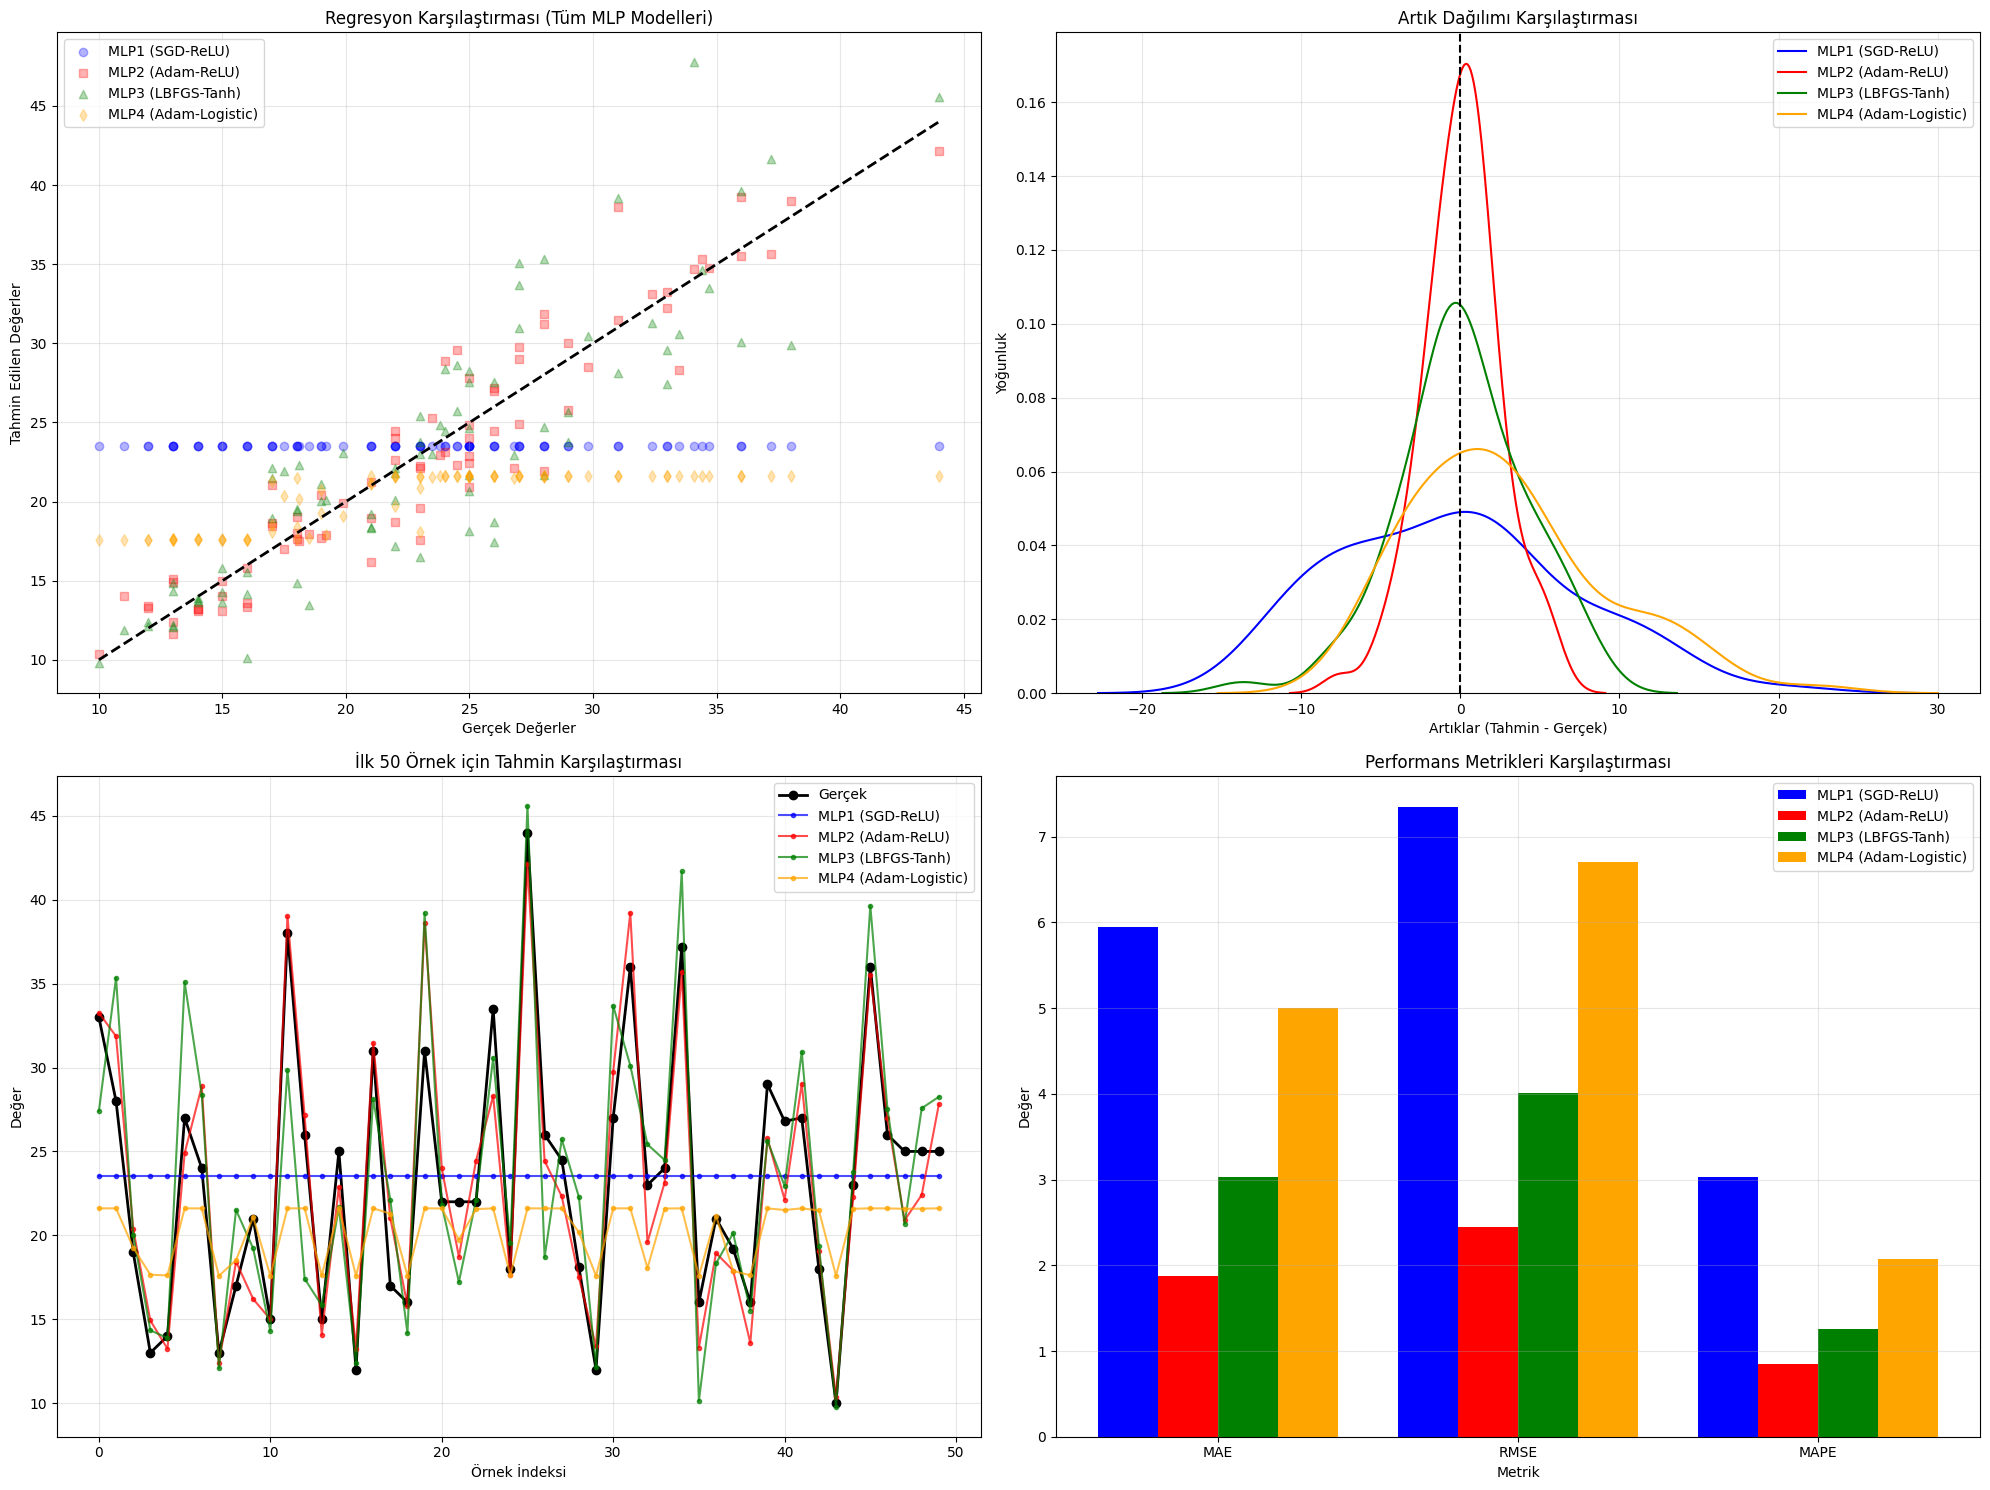


RMSE'ye göre en iyi model: MLP2 (Adam-ReLU)
R²'ye göre en iyi model: MLP2 (Adam-ReLU)


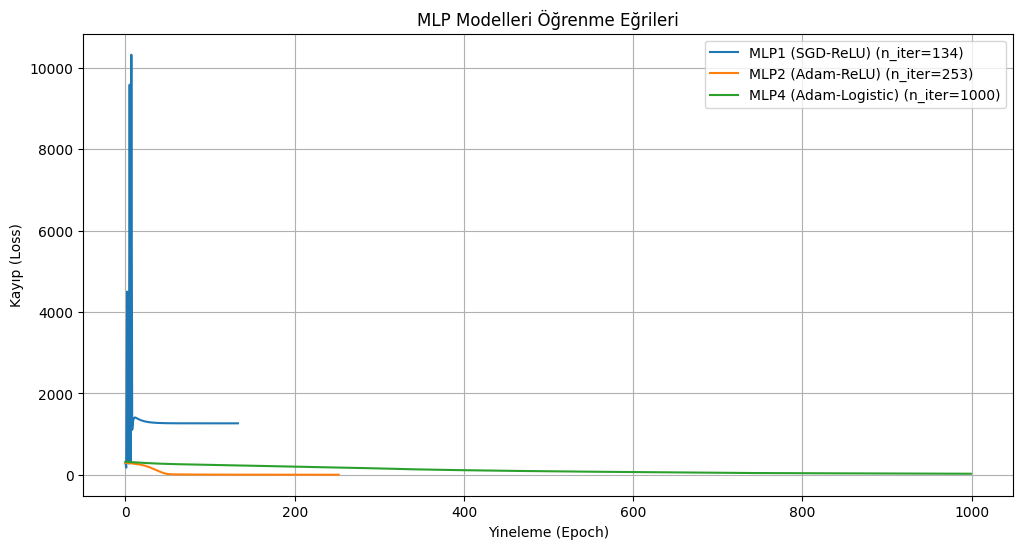

In [ ]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import time
from tabulate import tabulate

# Veri setini yükle
print("Veri seti yükleniyor...")
auto_mpg = fetch_ucirepo(id=9)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Veri hakkında bilgi
print(f"Veri seti boyutu: {X.shape[0]} örnek, {X.shape[1]} özellik")
print("Hedef değişken: ", y.columns[0])

# Kategorik ve sayısal sütunları belirle
categorical_cols = ['origin']  # 'origin' kategorik değişken
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Eksik değerleri doldurmak için imputer'ı tanımla
imputer = SimpleImputer(strategy='mean')

# Sayısal veriler için eksik değerleri doldur
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veri ön işleme pipeline'ı oluştur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Eğitim ve test verilerini ön işleme
print("Veri ön işleme yapılıyor...")
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Metrik hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # MAPE hesabı - 0 değerlerine dikkat
    mask = y_true.flatten() != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_true.flatten()[mask] - y_pred[mask]) / y_true.flatten()[mask])) * 100
    else:
        mape = np.nan

    return {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

# 4 farklı MLP modelini tanımla
print("MLP modelleri hazırlanıyor...")
mlp_models = {
    'MLP1 (SGD-ReLU)': MLPRegressor(
        hidden_layer_sizes=(40, 30, 20, 10),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.01,
        momentum=0.6,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    ),
    'MLP2 (Adam-ReLU)': MLPRegressor(
        hidden_layer_sizes=(30, 20, 10),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    ),
    'MLP3 (LBFGS-Tanh)': MLPRegressor(
        hidden_layer_sizes=(30, 20, 10),
        activation='tanh',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    'MLP4 (Adam-Logistic)': MLPRegressor(
        hidden_layer_sizes=(50, 30, 20),  # Farklı bir mimari
        activation='logistic',
        solver='adam',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
}

# Sonuçları ve tahminleri saklamak için veri yapıları
results = {}
predictions = {}
training_times = {}
iterations = {}

# Modelleri eğit ve test et
print("Model eğitimi başlıyor...")
for name, model in mlp_models.items():
    print(f"\n{name} eğitiliyor...")
    start_time = time.time()
    model.fit(X_train_scaled, y_train.values.ravel())
    training_time = time.time() - start_time
    training_times[name] = training_time

    # Yineleme sayısını kaydet
    iterations[name] = model.n_iter_

    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    metrics = calculate_metrics(y_test.values, y_pred)
    results[name] = metrics

    print(f"{name} eğitimi tamamlandı. Eğitim süresi: {training_time:.2f} saniye, {model.n_iter_} yineleme.")

# Sonuçları tablo olarak görüntüle
results_df = pd.DataFrame(results).T
results_df['Eğitim Süresi (sn)'] = pd.Series(training_times)
results_df['Yineleme Sayısı'] = pd.Series(iterations)
results_df = results_df.round(4)

print("\nMLP Modelleri Performans Karşılaştırma Tablosu:")
try:
    print(tabulate(results_df, headers='keys', tablefmt='grid'))
except ImportError:
    print(results_df)

# Görselleştirmeleri hazırla
plt.figure(figsize=(20, 15))

# 1. Regresyon Grafiği (Tüm modeller için karşılaştırmalı)
plt.subplot(2, 2, 1)
colors = ['blue', 'red', 'green', 'orange']
markers = ['o', 's', '^', 'd']

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.scatter(y_test.values.flatten(), y_pred, alpha=0.3,
                color=colors[i], marker=markers[i], label=name)

# Referans çizgisi
plt.plot([y_test.values.min(), y_test.values.max()],
         [y_test.values.min(), y_test.values.max()],
         'k--', lw=2)

plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Regresyon Karşılaştırması (Tüm MLP Modelleri)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Artık (Residuals) Dağılımı
plt.subplot(2, 2, 2)
for i, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test.values.flatten() - y_pred
    sns.kdeplot(residuals, label=name, color=colors[i])

plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Artıklar (Tahmin - Gerçek)')
plt.ylabel('Yoğunluk')
plt.title('Artık Dağılımı Karşılaştırması')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Tahmin Performansı (İlk 50 örnek)
plt.subplot(2, 2, 3)
sample_size = min(50, len(y_test))
indices = np.arange(sample_size)

# Gerçek değerler
plt.plot(indices, y_test.values.flatten()[:sample_size], 'ko-', lw=2, label='Gerçek')

# Tahminler
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.plot(indices, y_pred[:sample_size], color=colors[i], marker='.', linestyle='-', alpha=0.7, label=name)

plt.xlabel('Örnek İndeksi')
plt.ylabel('Değer')
plt.title('İlk 50 Örnek için Tahmin Karşılaştırması')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Metrik Karşılaştırma Grafiği
plt.subplot(2, 2, 4)

metrics = ['MAE', 'RMSE', 'MAPE']
X = np.arange(len(metrics))
width = 0.2

for i, (name, result) in enumerate(results.items()):
    values = [result['MAE'], result['RMSE'], result['MAPE']/10]  # MAPE değerini ölçekle
    plt.bar(X + i*width, values, width, label=name, color=colors[i])

plt.xlabel('Metrik')
plt.ylabel('Değer')
plt.title('Performans Metrikleri Karşılaştırması')
plt.xticks(X + width*1.5, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('auto_mpg_mlp_comparison.png', dpi=300)
plt.show()

# En iyi modeli belirle
best_model_rmse = results_df['RMSE'].idxmin()
best_model_r2 = results_df['R²'].idxmax()

print(f"\nRMSE'ye göre en iyi model: {best_model_rmse}")
print(f"R²'ye göre en iyi model: {best_model_r2}")

# Öğrenme eğrileri karşılaştırması (eğitim kayıpları)
plt.figure(figsize=(12, 6))

# Kayıp değerlerini çizmek için - sadece 'adam' ve 'sgd' çözücüleri için mevcut
for name, model in mlp_models.items():
    if hasattr(model, 'loss_curve_'):
        plt.plot(model.loss_curve_, label=f"{name} (n_iter={model.n_iter_})")

plt.xlabel('Yineleme (Epoch)')
plt.ylabel('Kayıp (Loss)')
plt.title('MLP Modelleri Öğrenme Eğrileri')
plt.legend()
plt.grid(True)
plt.savefig('learning_curves.png', dpi=300)
plt.show()
